# Pandas Basics <hr style="border:2.5px solid #126782"></hr>

Data Analyst: Jhea Faith S. Alcantara <br> Department: Electrical Engineering

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Data Frame

In [57]:
data = {
    "Name":['Sjey','Jiyang','Japet'],
    "Age":[18,19,20],
    "Sex":['F','F','M']
}
data

{'Name': ['Sjey', 'Jiyang', 'Japet'],
 'Age': [18, 19, 20],
 'Sex': ['F', 'F', 'M']}

In [58]:
df = pd.DataFrame(data)
df

,Name,Age,Sex
0,Sjey,18,F
1,Jiyang,19,F
2,Japet,20,M


In [59]:
data['Age']

[18, 19, 20]

In [60]:
df['Age']

0    18
1    19
2    20
Name: Age, dtype: int64

In [61]:
df['Age'].sum()

np.int64(57)

In [62]:
df['Age'].mean()

np.float64(19.0)

In [63]:
df['Name']

0      Sjey
1    Jiyang
2     Japet
Name: Name, dtype: object

In [64]:
measurements = {
    "Current":[2,3.5,1.8,4.2,2.7],
    "Power":[100,200,90,210,110]
}
measurements

{'Current': [2, 3.5, 1.8, 4.2, 2.7], 'Power': [100, 200, 90, 210, 110]}

In [65]:
device = pd.DataFrame(measurements)
device

,Current,Power
0,2.0,100
1,3.5,200
2,1.8,90
3,4.2,210
4,2.7,110


In [66]:
device.cov()

,Current,Power
Current,1.023,56.15
Power,56.150,3370.00


In [67]:
device.corr()

,Current,Power
Current,1.000000,0.956306
Power,0.956306,1.000000


In [68]:
device.describe()

,Current,Power
count,5.000000,5.000000
mean,2.840000,142.000000
std,1.011435,58.051701
min,1.800000,90.000000
25%,2.000000,100.000000
50%,2.700000,110.000000
75%,3.500000,200.000000
max,4.200000,210.000000


# Scatter Plot

In [73]:
type(m)

numpy.float64

In [74]:
type(x)

pandas.core.series.Series

In [ ]:
device['Current']

0    2.0
1    3.5
2    1.8
3    4.2
4    2.7
Name: Current, dtype: float64

In [ ]:
device['Power']

0    100
1    200
2     90
3    210
4    110
Name: Power, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

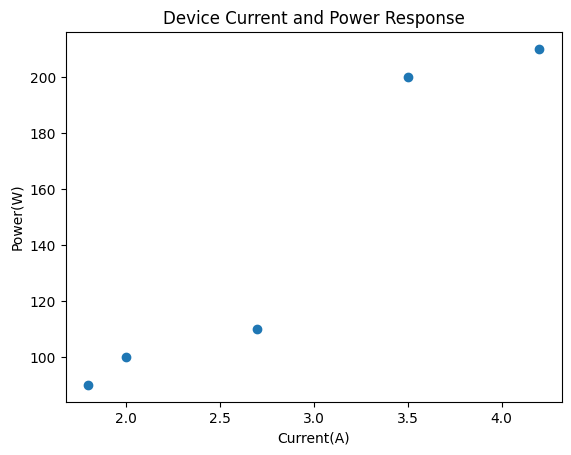

In [ ]:
x = device['Current']
y = device['Power']

plt.scatter(x,y)
plt.title("Device Current and Power Response")
plt.ylabel("Power(W)")
plt.xlabel("Current(A)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

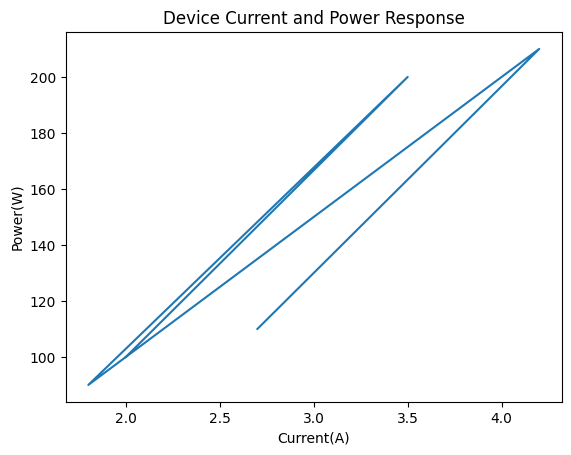

In [ ]:
x = device['Current']
y = device['Power']

plt.plot(x,y)
plt.title("Device Current and Power Response")
plt.ylabel("Power(W)")
plt.xlabel("Current(A)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

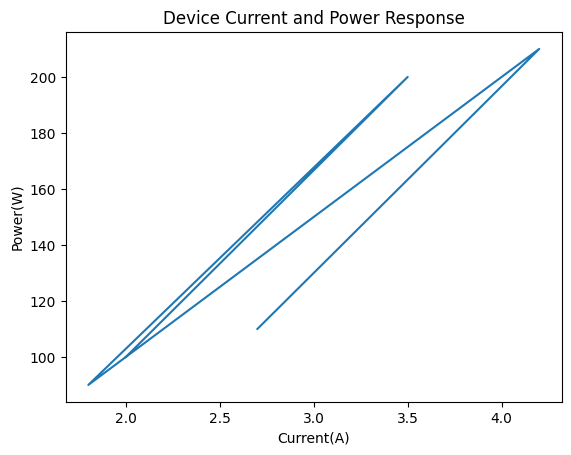

In [82]:
x = device['Current']
y = device['Power']

# regression line
stats.linregress(x,y)
m, b, r_value, p_value, std_err= stats.linregress(x,y)
line = m*x + b

plt.plot(x,y)
plt.title("Device Current and Power Response")
plt.ylabel("Power(W)")
plt.xlabel("Current(A)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

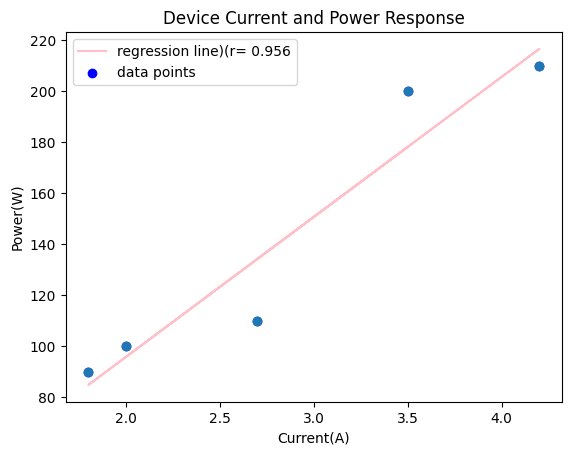

In [88]:
x = device['Current']
y = device['Power']

# regression line
stats.linregress(x,y)
m, b, r, p_value, std_err= stats.linregress(x,y)
line = m*x + b

plt.plot(x,line,
         color='pink',
         label=f'regression line)(r= {r:.3f}')

# scatter
plt.scatter(x,y,
            color='blue',
            label='data points')
plt.scatter(x,y)
plt.title("Device Current and Power Response")
plt.ylabel("Power(W)")
plt.xlabel("Current(A)")
plt.legend()
plt.show

# Resistance Test

In [91]:
resistance = pd.read_csv(r"resistance-test.csv")
resistance

,Test No.,Jaguar,Panther
0,1,10.6,10.1
1,2,9.1,11.0
2,3,9.3,9.1
3,4,9.8,20.0
4,5,10.5,9.2
5,6,10.4,10.8
6,7,9.5,9.9
7,8,11.0,9.2
8,9,10.4,9.1
9,10,3.0,9.1


In [93]:
resistance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Test No.  11 non-null     int64  
 1   Jaguar    11 non-null     float64
 2   Panther   10 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 396.0 bytes


In [101]:
jag_mean = resistance['Jaguar'].mean()
jag_mean

np.float64(9.399999999999999)

In [102]:
pan_mean = resistance['Panther'].mean()
pan_mean

np.float64(10.75)

In [105]:
resistance['Panther'] = resistance['Panther'].fillna(pan_mean)
resistance['Panther']


0     10.10
1     11.00
2      9.10
3     20.00
4      9.20
5     10.80
6      9.90
7      9.20
8      9.10
9      9.10
10    10.75
Name: Panther, dtype: float64

In [106]:
resistance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Test No.  11 non-null     int64  
 1   Jaguar    11 non-null     float64
 2   Panther   11 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 396.0 bytes


# Bar Graph

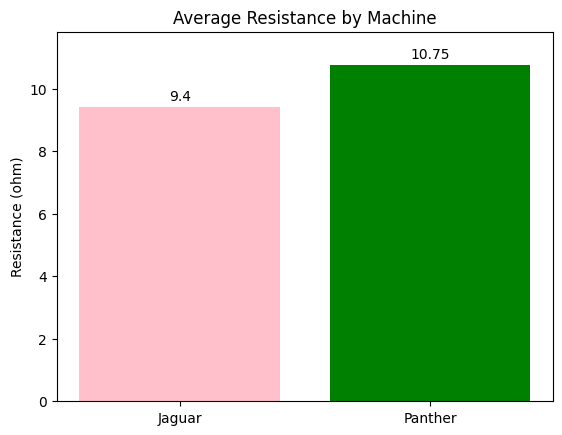

In [108]:
bars = plt.bar(['Jaguar','Panther'],[jag_mean,pan_mean],
               color =["pink","green"])
plt.title('Average Resistance by Machine')
plt.ylabel('Resistance (ohm)')

#bar label
plt.bar_label(bars,padding=3)
plt.margins(y=0.1)

plt.show()